<a href="https://colab.research.google.com/github/rfdornelles/mds_ML_project/blob/main/baseline_gradient_boost_karon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rfdornelles/mds_ML_project/main/data/karon2.csv")

In [ ]:
df.head()

,year,country,temp,population,qnt_death_heat_cold_exposure
0,1990,Albania,6.168940,3286542,5
1,1991,Albania,6.219891,3266790,5
2,1992,Albania,6.284930,3247039,5
3,1993,Albania,6.324316,3227287,5
4,1994,Albania,6.357706,3207536,5


In [2]:
df.columns

Index(['year', 'country', 'temp', 'population', 'qnt_death_heat_cold_exposure',
       'temp_diff'],
      dtype='object')

In [3]:
X = df.drop(["qnt_death_heat_cold_exposure", "country"], axis = 1)
y = df["qnt_death_heat_cold_exposure"]

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [6]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 13817.0448


In [7]:
from sklearn.pipeline import Pipeline

# Our data has different dimesions, so let's scale it. Import Scaler

from sklearn.preprocessing import StandardScaler

# Now let's chose our model 

from sklearn.gaussian_process import GaussianProcessRegressor

# Two step pipeline. First preprocess the data with the Standard Scaler,
# then add the model, in this case a Logistic Regression 

pipe = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', ensemble.GradientBoostingRegressor(**params))     # Step 2
                 ])

In [12]:
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 13495.4259


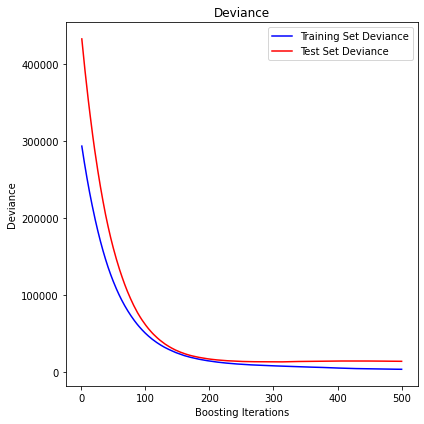

In [9]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = pipe['model'].loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

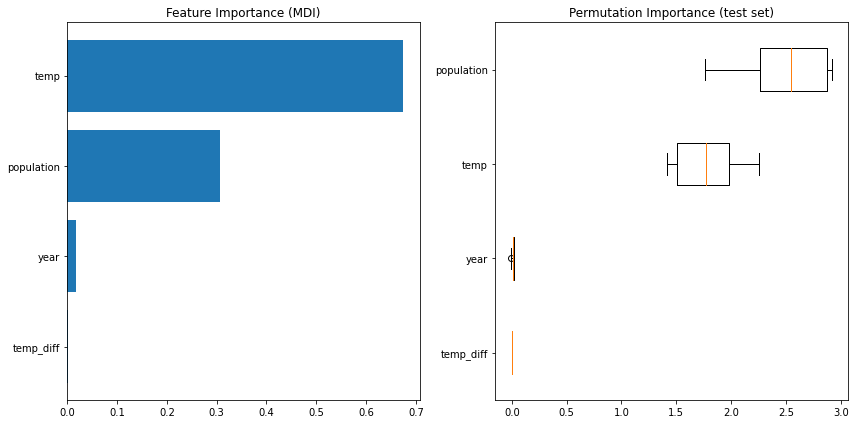

In [10]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import r2_score, mean_squared_error


R2 = r2_score(y_test, pred)


n = X.shape[0]
p = X.shape[1]
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

rmse = mean_squared_error(y_test, pred, squared = False)
mse = mean_squared_error(y_test, pred, squared = True)

print("R2:", R2)
print("AdjR2:", Adj_r2)
print("RMSE:", rmse)
print("MSE:", mse)

R2: 0.9693484474891354
AdjR2: 0.9692727178967676
RMSE: 116.16981492996013
MSE: 13495.425900861186
